# Visualize UMAP for CP features

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

install.packages(c("gridExtra", "ggarrange"))
library(gridExtra)

Warning message:
“package ‘ggarrange’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Set directory and file structure
umap_dir <- file.path("results")
plate3_name <- "localhost230405150001"
umap_file <- "UMAP_localhost230405150001_sc_norm_fs_cellprofiler.csv.gz.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)


output_fig_dir <- file.path("figures")
umap_prefix <- "UMAP_"
plate_suffix <- "_sc_norm_fs_cellprofiler.csv.gz.tsv.gz"

# Define output figure paths

output_umap_file = file.path(output_fig_dir,
paste0(umap_prefix, plate3_name))
        
print(output_umap_file)

[1] "figures/UMAP_localhost230405150001"


In [3]:
# Load in the umap data
df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "d",
        "Metadata_WellRow" = "c",
        "Metadata_WellCol" = "c",
        "Metadata_heart_number" = "c",
        "Metadata_treatment" = "c",
        "Metadata_ImageNumber" = "c",
        "Metadata_cell_type" = "c",
        "Metadata_heart_failure_type" = "c",
        "Metadata_Plate" = "c",
        "Metadata_Well" = "c",
        "Metadata_Cytoplasm_Parent_Cells" = "c",
        "Metadata_Cytoplasm_Parent_Nuclei" = "c",
        "Metadata_Cells_Number_Object_Number" = "c",
        "Metadata_Nuclei_Number_Object_Number" = "c"
    )
)
cell_count_df <- df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count()

umap_cp_df <- df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well")

## Generate UMAPs

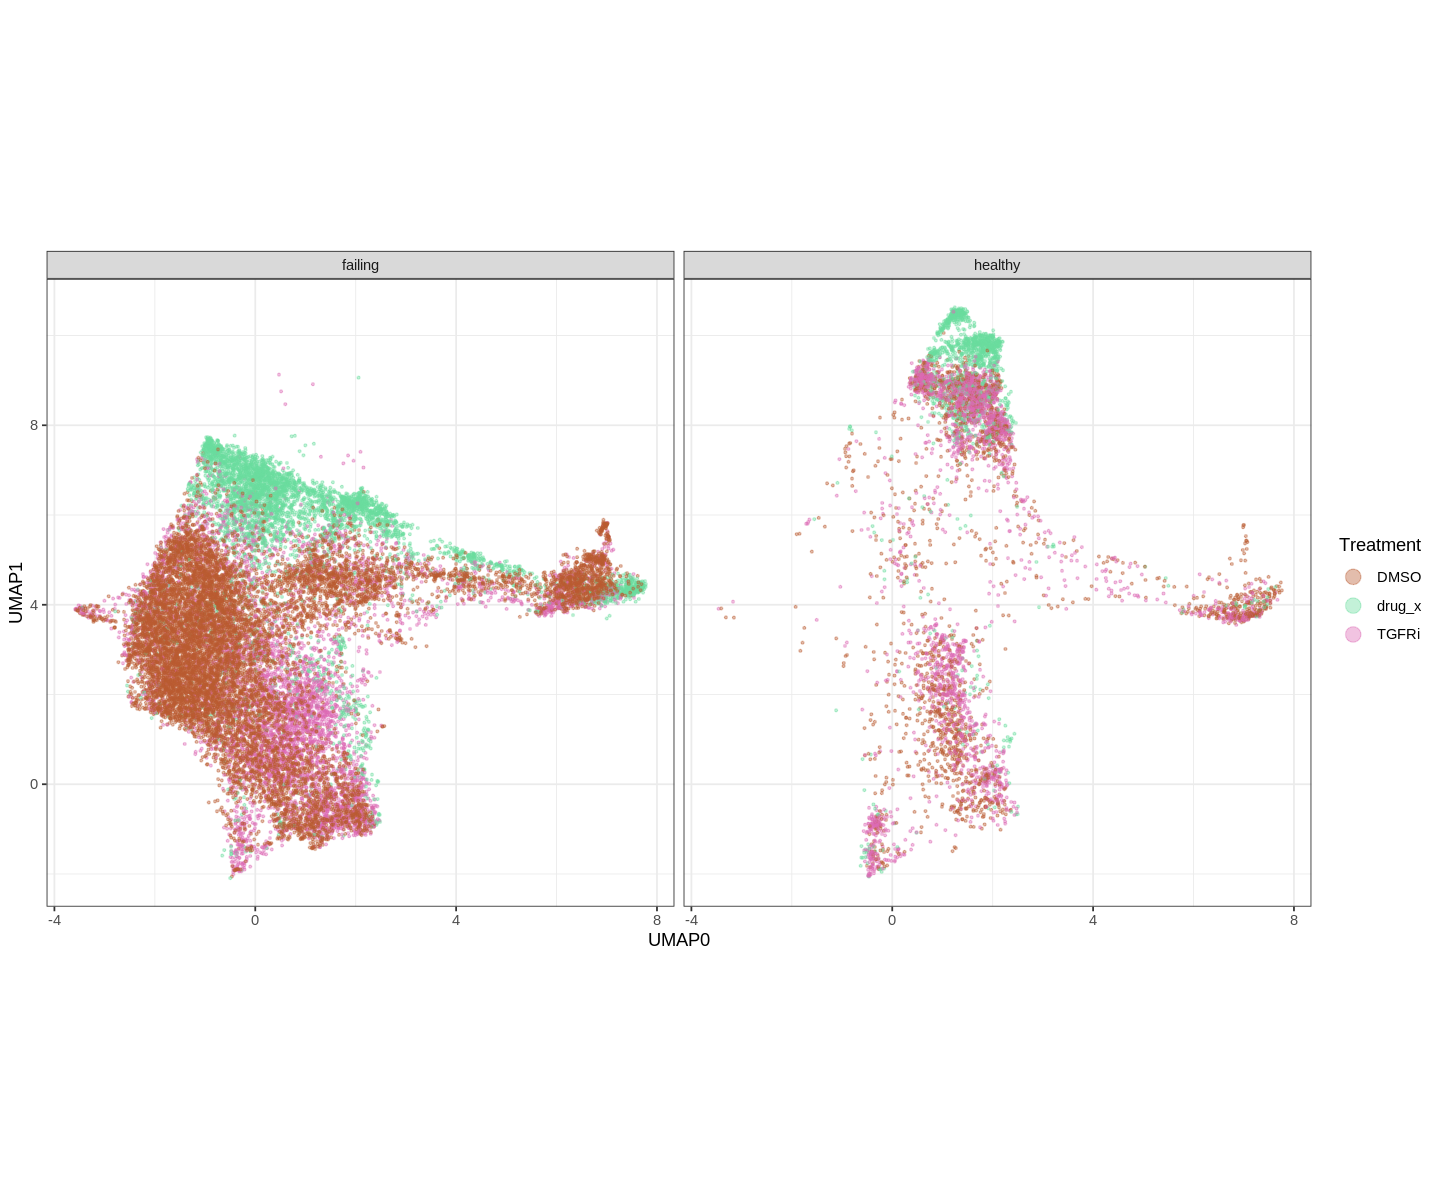

In [4]:
# Generating UMAPs 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.5, alpha = 0.4) +  # Adjusted alpha value
  theme_bw() +
  scale_color_manual(name = "Treatment",
                     values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E", "TGFRi" = "#DC69B4")) +
  facet_wrap(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  theme(aspect.ratio = 1)

ggsave(output_file, treatment_gg, dpi = 500, height = 12, width = 10)

print(treatment_gg)

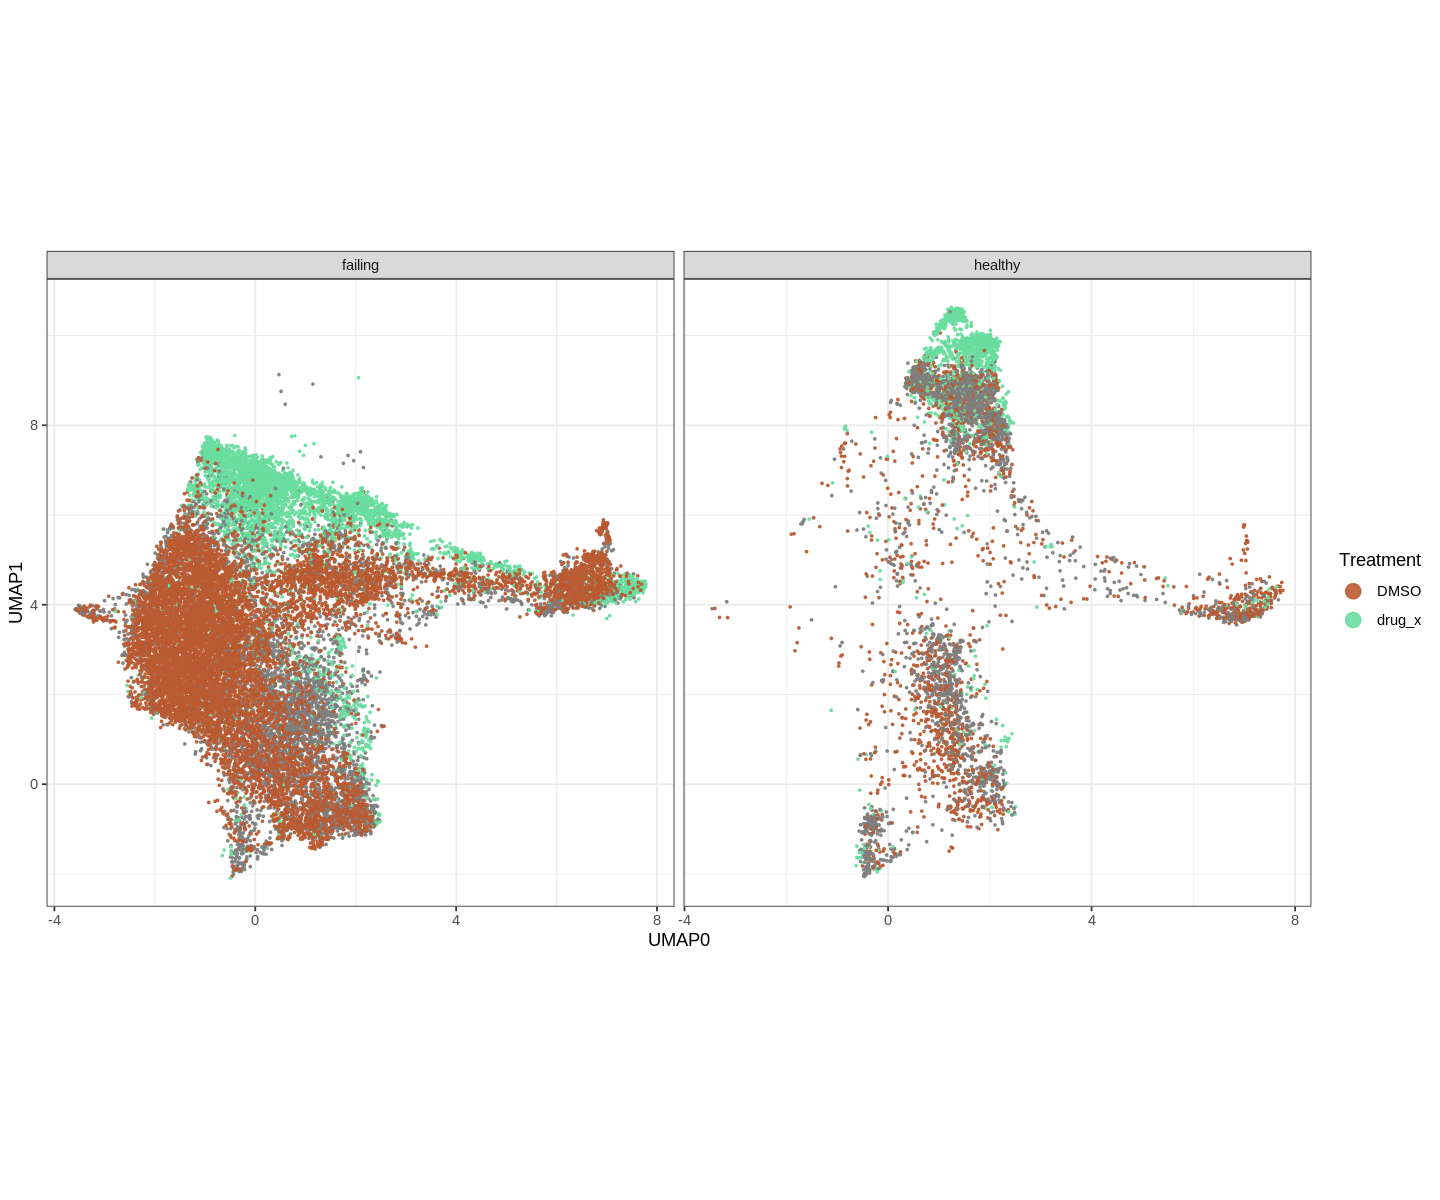

In [5]:
# Generating UMAP comparing failing and healthy with DMSO and Drug_X
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_dmso_drugx.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E")
  ) +
  facet_grid(~ Metadata_cell_type, scales = "free") +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  theme(aspect.ratio = 1)


ggsave(output_file, treatment_gg, dpi = 500, height = 12, width = 10)


print(treatment_gg)

In [6]:
# Filter the data frames
failing_drug_x_df <- umap_cp_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "drug_x")
failing_DMSO_df <- umap_cp_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "DMSO")
healthy_DMSO_df <- umap_cp_df %>% filter(Metadata_cell_type == "healthy" & Metadata_treatment == "DMSO")

In [7]:
print(paste0("failing", " + ", "drug_x"))
print(paste0("failing", "+", "DMSO"))
print(paste0("healthy", " + ", "DMSO"))

[1] "failing + drug_x"
[1] "failing+DMSO"
[1] "healthy + DMSO"


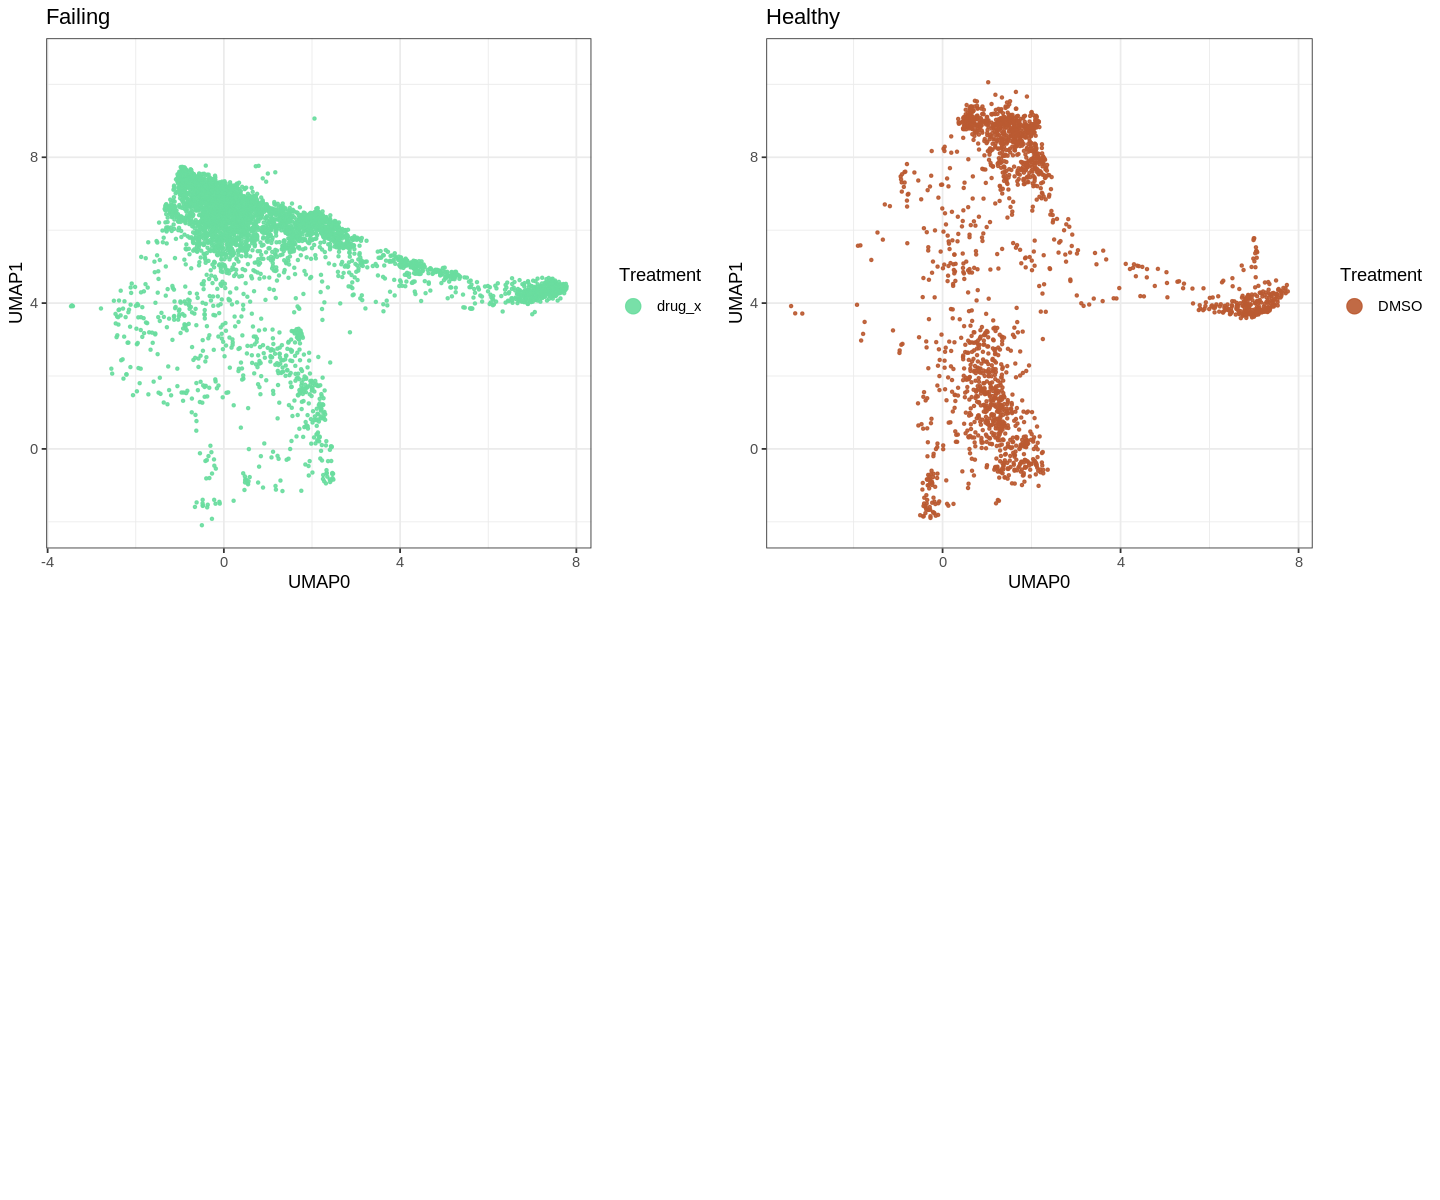

In [8]:
# UMAP Plot healthy w/ DMSO and failing w/ treatment
# plot 1 -> failing w/ Drug_X
# plot 2 -> healthy w/ DMSO
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_health_vs_failing.png")

# plot 
plot1 <- ggplot(failing_drug_x_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("drug_x" = "#69DC9E")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Failing") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

plot2 <- ggplot(healthy_DMSO_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Healthy") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

# merging both plots into one figure
merged_plot <- grid.arrange(
  plot1, plot2, ncol = 2,
  widths = c(1, 1), heights = c(1, 1)
)

# saving image
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 10)


In [9]:
# Set the size of each plot
# UMAP Plot healthy w/ DMSO and failing w/ treatment
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healhy_DMSO.png")

# combine all dfs
combined_df <- rbind(
  failing_drug_x_df %>% mutate(Group = "Failing with Drug_X"),
  healthy_DMSO_df %>% mutate(Group = "Healthy with DMSO"),
  failing_DMSO_df %>% mutate(Group = "Failing with DMSO")
)

# Plot the combined data with facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Metadata_treatment)) +
  geom_point(size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("drug_x" = "#69DC9E", "DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Group, scales = "free") + 
  theme(aspect.ratio = 1)


# Saving image
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)


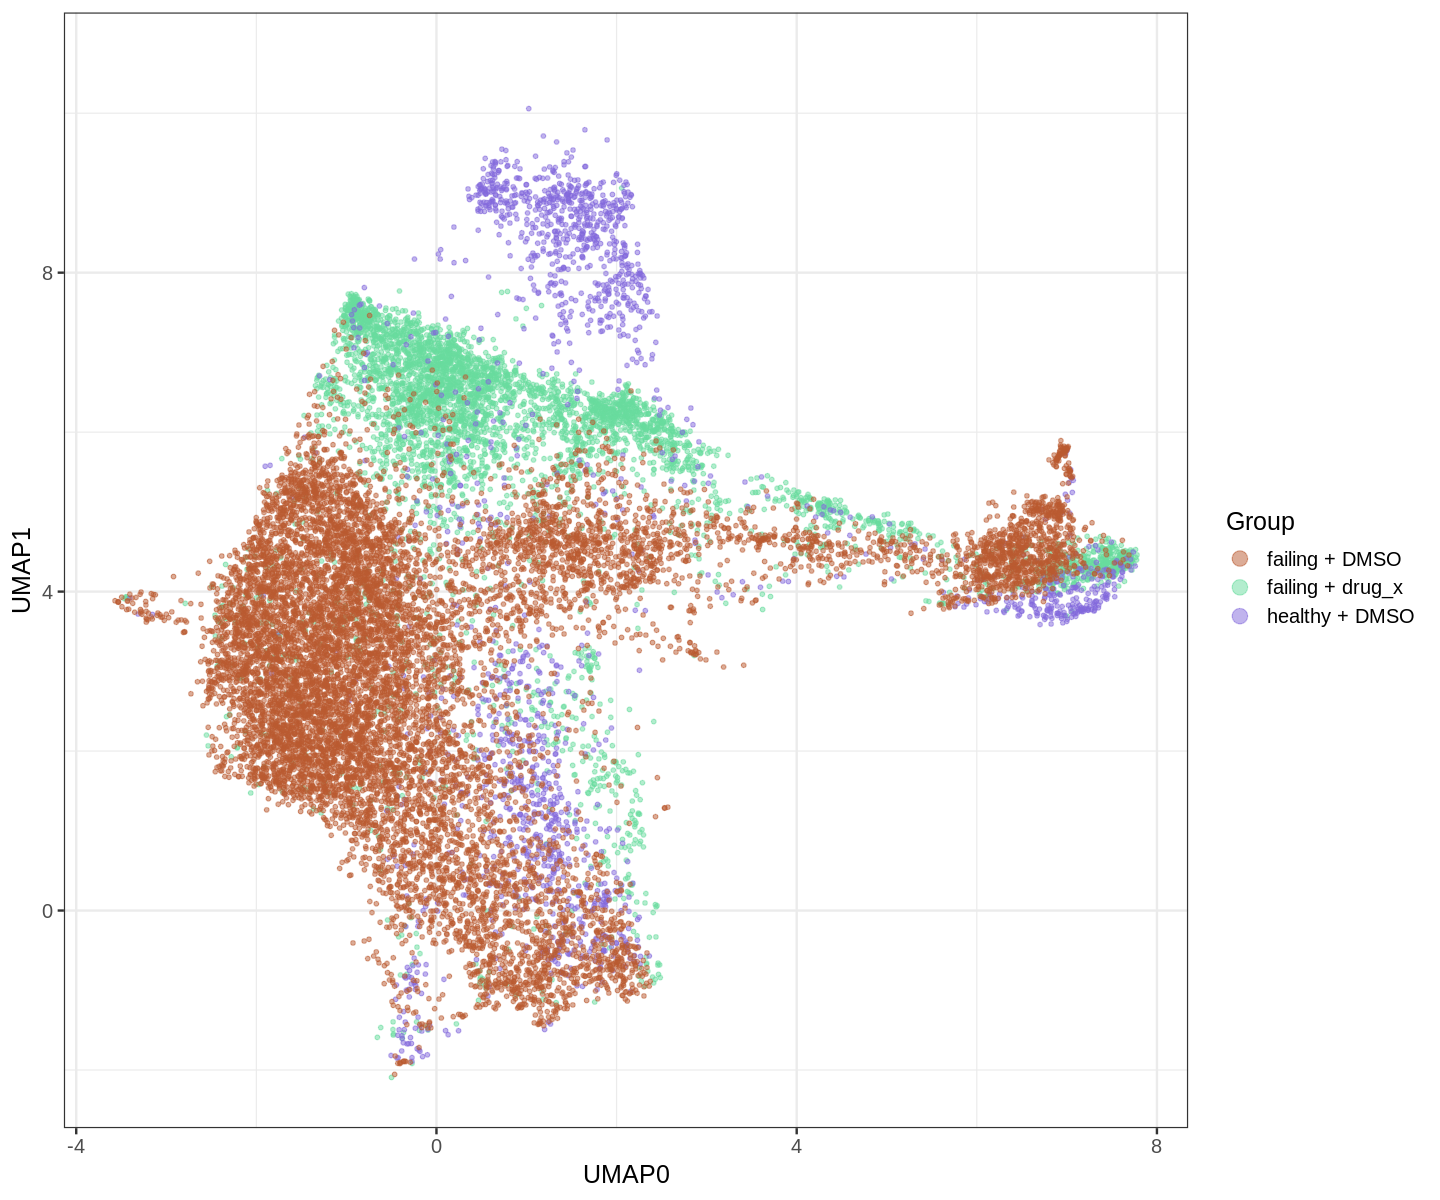

In [10]:
# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healhy_DMSO_Merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  failing_drug_x_df %>% mutate(Group = "failing + drug_x"),
  healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
  failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Plot the combined data without facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0 , alpha = 0.5) +  # Adjust alpha value to make points more transparent
  theme_bw(base_size = 15) +  # Set the base font size to 12
  scale_color_manual(
    name = "Group",
    values = c("failing + drug_x" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

# print and save plot
print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)

In [11]:
# Only extracting DMSO only entries
dmso_df <- subset(umap_cp_df, Metadata_treatment == "DMSO")
dmso_failing_df <- subset(dmso_df, Metadata_cell_type == "failing")
dmso_healthy_df <- subset(dmso_df, Metadata_cell_type == "healthy")


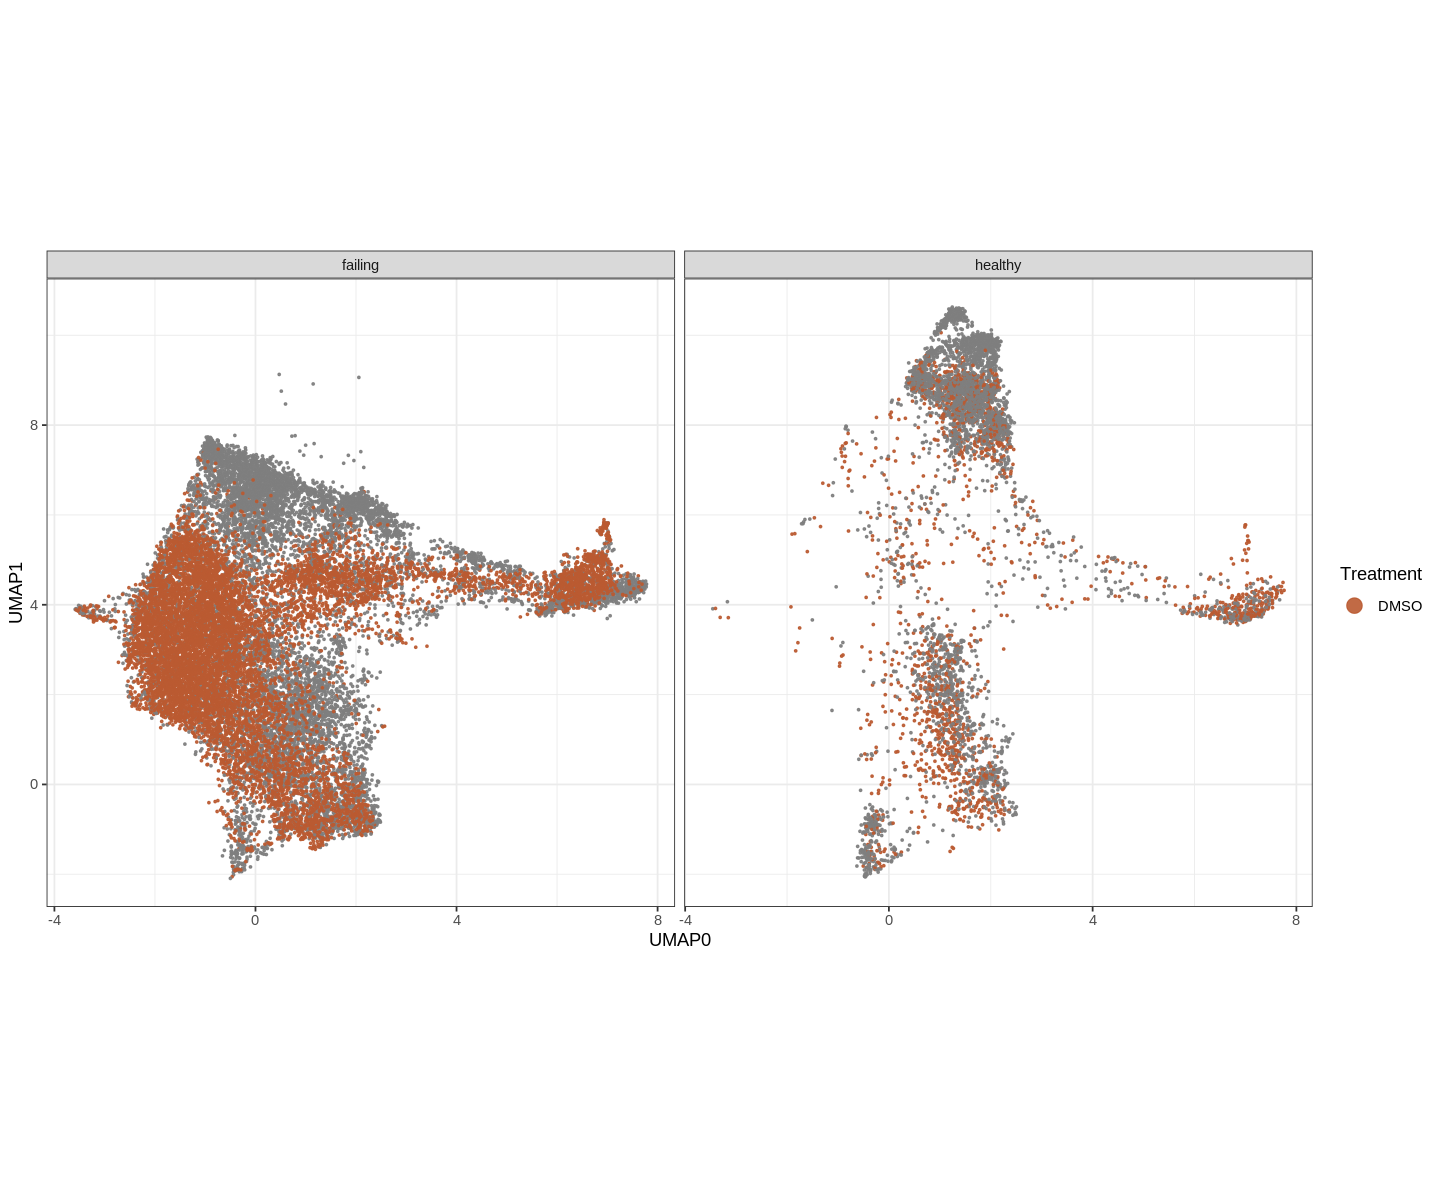

In [12]:
# plotting UMAP failing and non-failing DMSO only 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Metadata_cell_type, scales = "free") +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  theme(aspect.ratio = 1)


ggsave(output_file, treatment_gg, dpi = 500, height = 12, width = 10)


print(treatment_gg)

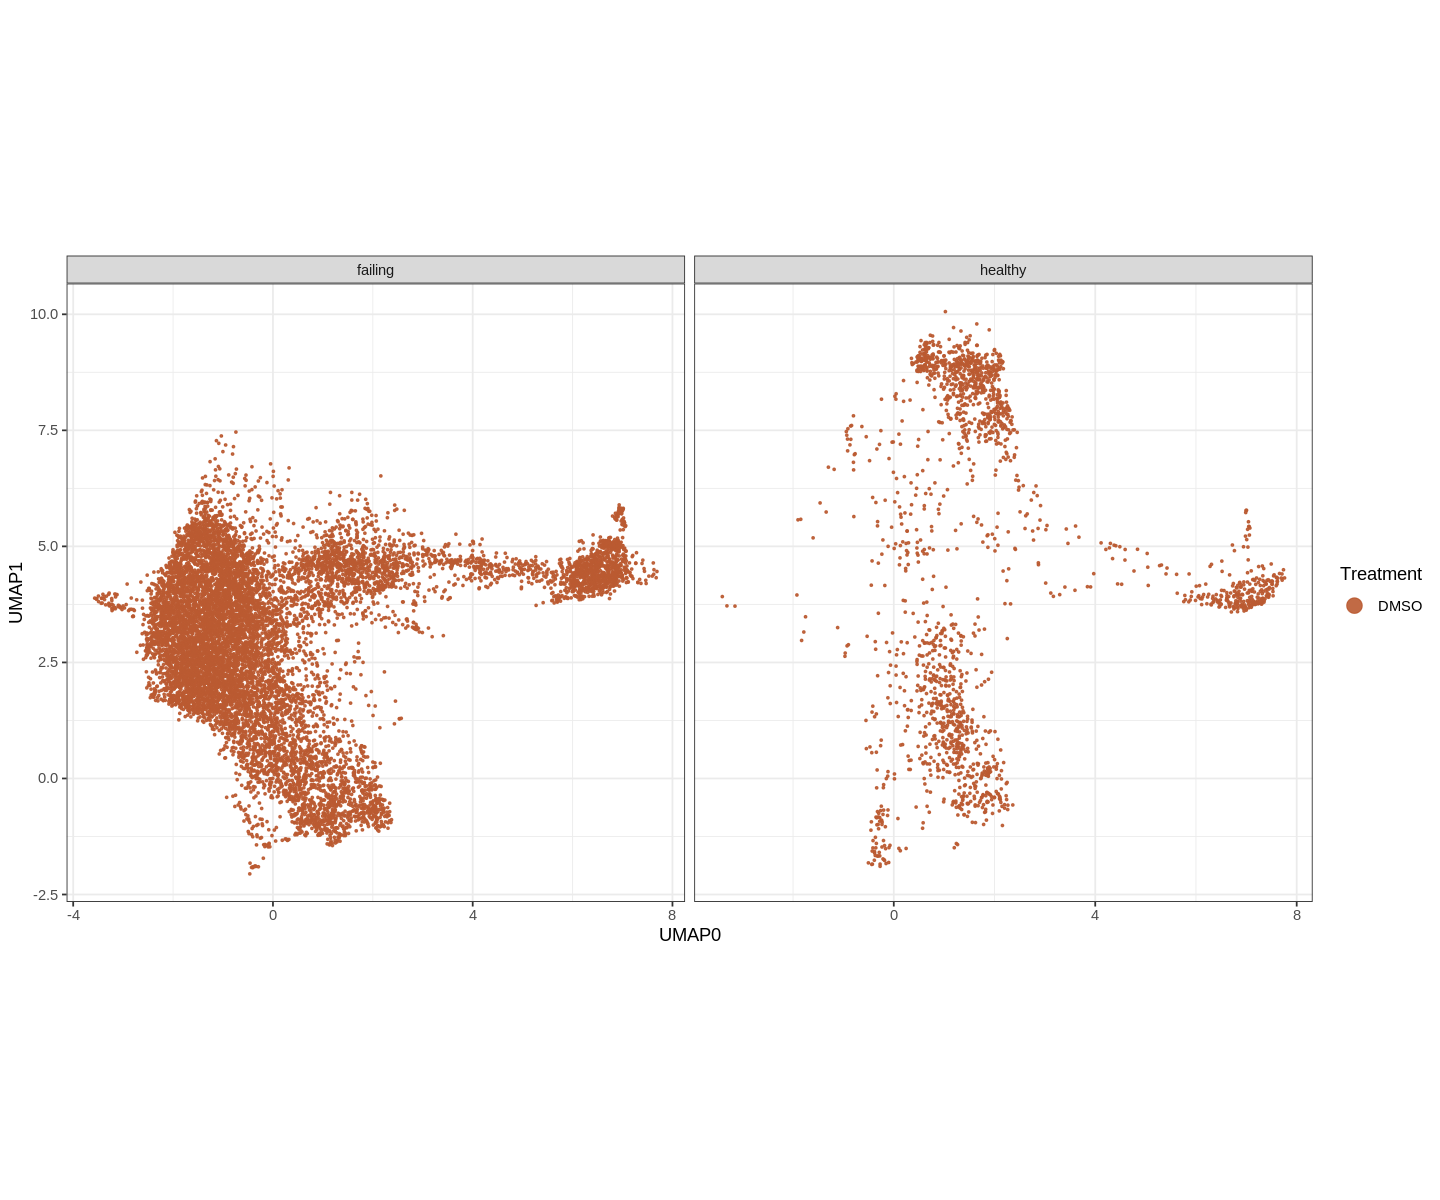

In [13]:
# plotting UMAP failing and non-failing DMSO only 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_cleaned.png")

treatment_gg <- ggplot(dmso_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Metadata_cell_type, scales = "free") +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  theme(aspect.ratio = 1)

ggsave(output_file, treatment_gg, dpi = 500, height = 12, width = 10)

print(treatment_gg)


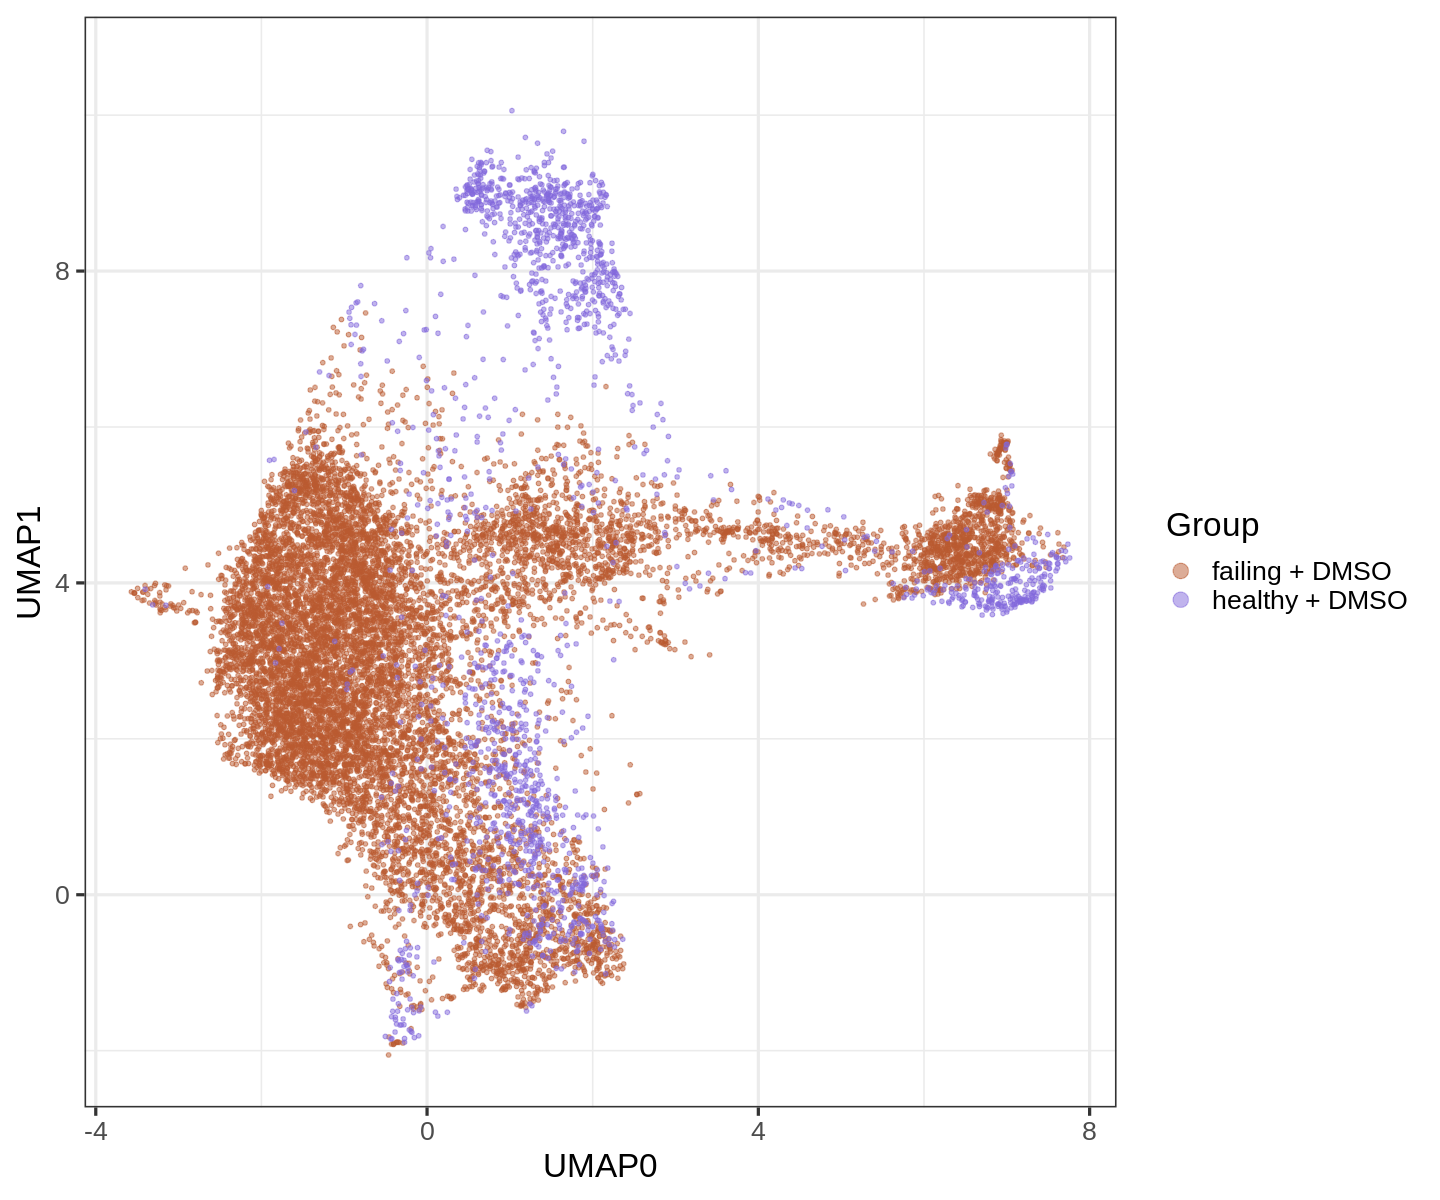

In [14]:
# output name 
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_cleaned_merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  dmso_failing_df %>% mutate(Group = "failing + DMSO"),
  dmso_healthy_df %>% mutate(Group = "healthy + DMSO")
)

merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0, alpha = 0.5) +  # Adjust alpha value to make points more transparent
  theme_bw(base_size = 20) +  # Set the base font size to 20 (adjust as desired)
  scale_color_manual(
    name = "Group",
    values = c("failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))

print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)
